In [2]:
import pandas as pd
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
df = pd.read_csv('https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/uber-raw-data-apr14.csv?raw=true')

#Convert date/time and add some useful columns

In [15]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [22]:
#Creating a Date of Month column

def get_dom(dt):
    return dt.day
df['DoM'] =df['Date/Time'].map(get_dom)

#Creating a weekday column

def get_weekday(dt):
    return dt.weekday()
df['Weekday'] = df['Date/Time'].map(get_weekday)

#Creating a hour column

def get_hour(dt):
    return dt.hour
df['Hour'] = df['Date/Time'].map(get_hour)

In [23]:
df.tail()

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

##Analyze the DoM

In [24]:
df.describe()

,Lat,Lon,DoM,Weekday,Hour
count,564516.000000,564516.000000,564516.000000,564516.00000,564516.000000
mean,40.740005,-73.976817,16.117127,2.86698,14.465043
std,0.036083,0.050426,9.048139,1.82081,5.873925
min,40.072900,-74.773300,1.000000,0.00000,0.000000
25%,40.722500,-73.997700,8.000000,1.00000,10.000000
50%,40.742500,-73.984800,16.000000,3.00000,16.000000
75%,40.760700,-73.970000,24.000000,4.00000,19.000000
max,42.116600,-72.066600,30.000000,6.00000,23.000000


Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

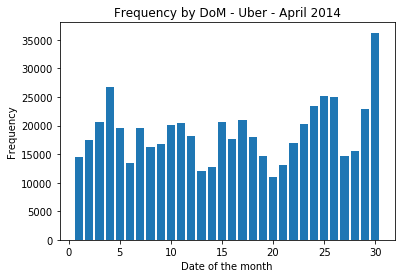

In [25]:
hist(df.DoM, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014')

In [26]:
def count_rows(rows):
    return(len(rows))

by_date = df.groupby('DoM').apply(count_rows)

In [27]:
by_date_sorted = by_date.sort_values()

''

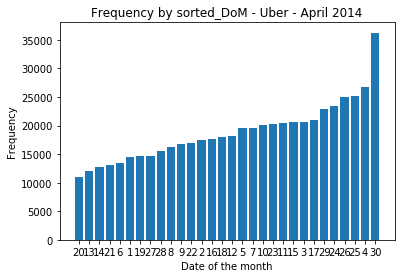

In [28]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by sorted_DoM - Uber - April 2014')
;

##Analyze the Hour

In [29]:
def count_rows(rows):
    return(len(rows))

by_hour = df.groupby('Hour').apply(count_rows)

by_hour_sorted = by_hour.sort_values()

''

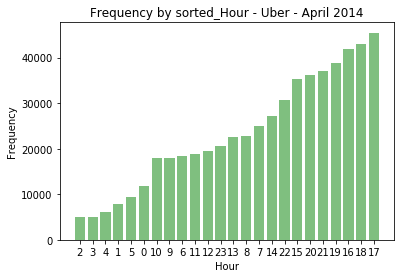

In [49]:
bar(range(1,25), by_hour_sorted,color='g',alpha=0.5)
xticks(range(1,25), by_hour_sorted.index)
xlabel('Hour')
ylabel('Frequency')
title('Frequency by sorted_Hour - Uber - April 2014')
;

##Analyze the weekday

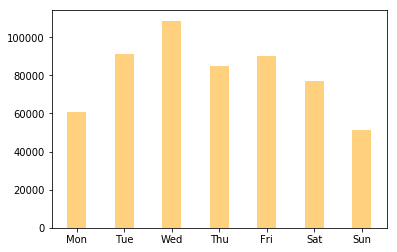

In [47]:
hist(df.Weekday, bins=7, range=(-.5, 6.5), rwidth=.4, color='orange',alpha=0.5)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

##Cross analysis(hour, weekday)

In [32]:
by_h_w = df.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

In [33]:
by_h_w

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


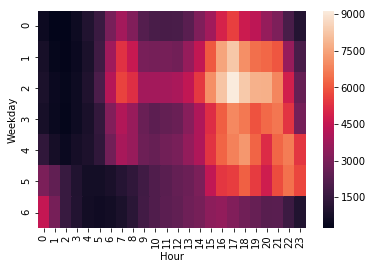

In [34]:
seaborn.heatmap(by_h_w)

# By lat and lon

''

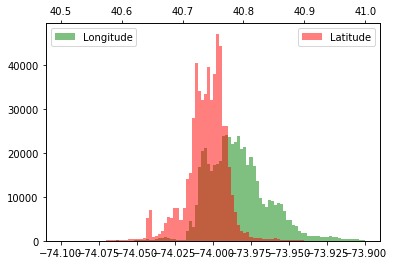

In [35]:
hist(df['Lon'], bins=100, range=(-74.1, -73.9), color='g', alpha=.5, label="Longitude")
legend(loc='upper left')
twiny()
hist(df['Lat'], bins=100, range=(40.5, 41), color='r', alpha=.5, label="Latitude")
legend(loc='best')
;

(40.7, 41)

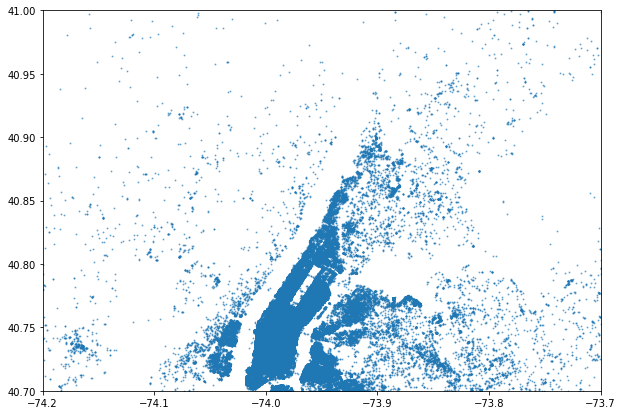

In [36]:
figure(figsize=(10,7))
plot(df['Lon'], df['Lat'], '.', ms=2, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)